# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Составим первое представление о данных Яндекс Недвижимость.

In [660]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [661]:
# Сохраним данные из файла в переменной df
df = pd.read_csv('/datasets/real_estate_data.csv', sep = "\t")
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [662]:
# Получим общую информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В ходе первичного рассмотрения данных можно выделить несколько моментов:

1) В таблице присутствуют столбцы, в названиях которых присутствуют стилистические ошибки:

- использованы заглавные буквы,
- отдельные слова написаны слитно.

2) Всего в датасете 23 699 строк, но данные не по всем столбцам заполнены полностью - есть пропуски.

3) Есть ошибки в выборе типа данных.

### Вывод

В датасете представлена информация из объявлений о продаже квартир в СПб и соседних населённых пунктах за несколько лет. В виду того, что часть данных вносилась вручную, в них с большой вероятностью есть ошибки, из тех, что мы смогли выявить на первый взгляд: неверные наименования, пропуски и неверный тип данных.

## Предобработка данных

Исправим ошибки, которые были обнаружены на первом шаге.

In [663]:
# Переименуем столбцы
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest','parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'})
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [664]:
# Посчитаем пропуски
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обратимся к документации и определим план действий для обработки пропусков по каждому столбцу в отдельности:
 - `ceiling_height` - *высота потолков (м)*, этот параметр может значительно отличаться, и даже в одном доме высота потолков может быть разной. Также он вряд ли зависит от каких-либо других данных в таблице, поэтому оставим данные по этому столбцу как есть.
 
 - `floors_total` - *количество этажей в доме*, вероятно, данную информацию можно восстановить по другим объявлениям из датасета, если удастся точно определить, что квартиры находятся в одном доме, но в данном случае пропуски составляют менее 1% от общего объема данных, поэтому можем их исключить из исследования.
 
 - `living_area` - *жилая площадь в квадратных метрах (м²)*, этот параметр может значительно отличаться, неверно заполнять пропуски в данных каким-либо средним значением, оставим пропуски как есть.
 
 - `is_apartment` - *апартаменты (булев тип)*, вероятно, если данных нет, то объект не относится к типу апартаментов, пропуски можно заменить на False.
 
 - `kitchen_area` - *площадь кухни в квадратных метрах (м²)*, этот параметр также может значительно отличаться, поэтому неверно заполнять пропуски в данных каким-либо средним значением, оставим данные как есть.
 
 - `balcony` - *число балконов*, можно предположить, что пропуски в данных свидетельствуют о том, что балкона в квартире нет, поэтому можно заменить их на 0.
 
 - `locality_name` - *название населённого пункта*, так как наши данные относятся к одной области, предполагаем, что это не столь значимый параметр в нашем исследовании и данными можно пренебречь, к тому же пропуски составляют менее 1%.
 
 - `airports_nearest` - *расстояние до ближайшего аэропорта в метрах (м)*, пропуски в данных по ЛО можно заполнить средним значением, сгруппировав данные по столбцу `locality_name`. Если пропуски есть по СПб, мы не сможем корректно заполнить данные.
 
 - `city_centers_nearest` - *расстояние до центра города (м)*, аналогично предыдущему пункту пропуски в данных по ЛО - заполнить средним значением, сгруппировав данные по столбцу `locality_name`.
 
 - `parks_around_3000` - *число парков в радиусе 3 км* и `ponds_around_3000` - *число водоёмов в радиусе 3 км*, пропуски в данных могут свидетельствовать о том, что парков и водоемов побдизости нет, заменим пропуски на 0.
 
 - `parks_nearest` - *расстояние до ближайшего парка (м)* и `ponds_nearest` - *расстояние до ближайшего водоёма (м)*, эти параметры могут значительно отличаться, поэтому заполнять данные средним или медианным значением не очень хорошая идея - оставим как есть.
 
- `days_exposition` - сколько дней было размещено объявление (от публикации до снятия), пропуски по этому столбцу также оставим без изменений, так как они с большой вероятностью не повлияют на цель нашего исследования.

In [665]:
# Удалим строки с пропусками, где пропуски составляют менее 1% 
df = df.dropna(subset=['floors_total', 'locality_name'])
# Заполним пропуски в столбце is_apartment на значение False
df['is_apartment'] = df['is_apartment'].fillna(False)
# Заполним пропуски в столбце balcony,parks_around_3000 и ponds_around_3000 на 0
df['balcony'] = df['balcony'].fillna(0)
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

Прежде чем заполнить пропуски средним значением по столбцам airports_nearest и city_centers_nearest необходимо избавиться от дубликатов и аномалий.

In [666]:
# 1) Найдём явные дубликаты
df.duplicated().sum()

0

Явных дубликатов нет.

In [667]:
# 2) Найдём неявные дубликаты по слолбцу locality_name
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [668]:
# 2.1) Заменим 'поселок' на 'посёлок'
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок')
# 2.2) Приведём одни и те же населенные пункты к единому наименованию
df['locality_name'] = df['locality_name'].replace('посёлок Мурино','Мурино')
df['locality_name'] = df['locality_name'].replace('деревня Кудрово','Кудрово')

In [669]:
# 3) проверим есть ли аномальные значения по каждому из столбцов
df[['airports_nearest','city_centers_nearest']].describe()

,airports_nearest,city_centers_nearest
count,18041.000000,18064.000000
mean,28797.082701,14192.656056
std,12632.499735,8613.348153
min,0.000000,181.000000
25%,18565.000000,9238.000000
50%,26757.000000,13096.500000
75%,37273.000000,16285.000000
max,84869.000000,65968.000000


In [670]:
# Выведем на экран строки с нулевым расстоянием до аэропорта
df[df['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,False,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [671]:
# Удалим выброс
df = df.loc[df['airports_nearest'] != 0]
# Ещё раз выведем общую статистическую информацию
df[['airports_nearest','city_centers_nearest']].describe()

,airports_nearest,city_centers_nearest
count,18040.000000,18063.000000
mean,28798.678991,14192.179483
std,12631.030137,8613.348417
min,6450.000000,181.000000
25%,18571.000000,9238.000000
50%,26757.000000,13095.000000
75%,37273.000000,16285.000000
max,84869.000000,65968.000000


In [672]:
# 4) Заполним пропуски в столбцах медианным значением, сгруппировав данные по locality_name и отбросив значения по СПб
df.loc[df['locality_name'] != 'Санкт-Петербург','airports_nearest'] = df.query('not (locality_name == "Санкт-Петербург")').groupby('locality_name')['airports_nearest'].apply(lambda s: s.fillna(s.mean())) 
df.loc[df['locality_name'] != 'Санкт-Петербург','city_centers_nearest'] = df.query('not (locality_name == "Санкт-Петербург")').groupby('locality_name')['city_centers_nearest'].apply(lambda s: s.fillna(s.mean())) 
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5516
city_centers_nearest     5492
parks_around_3000           0
parks_nearest           15534
ponds_around_3000           0
ponds_nearest           14528
days_exposition          3171
dtype: int64

Пропусков по столбцам `airports_nearest` и `city_centers_nearest` стало меньше совсем на чуть-чуть, обработка значительно не помогла, вероятно, из-за того, что большинство объявлений находится в пределах СПб, и есть ряд населенных пунктов, в которых нет данных по этим столбцам ни в одном из объявлений.

Последнее, что необходимо сделать на этапе предобработки данных, - привести данные к нужным типам. Исправим тип данных по следующим столбцам:
- `first_day_exposition` (тип данных: object) - переведем данные в формат даты, чтобы в дальнейшем можно было выделить день недели, месяц и год.
- `is_apartment` (тип данных: object) - переведем данные в булевский тип, согласно документации
- `balcony`, `parks_around_3000` и `ponds_around_3000` (тип данных: float64) - переведем данные в целочисленный тип (int), так как число балконов, парков и водоемов может быть только целым числом

In [673]:
# Приведем данные к нужным типам
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
df['is_apartment'] = df['is_apartment'].astype(bool)
df[['balcony','parks_around_3000','ponds_around_3000']] = df[['balcony','parks_around_3000','ponds_around_3000']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  float64       
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        14480 non-null  float64       
 6   floors_total          23564 non-null  float64       
 7   living_area           21699 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          21342 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу следующие данные:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [674]:
# Добавим в датафрейм столбец с расчетом цены за 1 кв.м. - cost_per_square_meter
df['cost_per_square_meter'] = (df['last_price'] / df['total_area']).round().astype(int)
# Разделим дату публикации на день недели (считается с понедельника = 0 по воскресенье = 6), месяц (считается с Января = 1 по Декабрь = 12) и год
df['day_of_week_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_square_meter,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82921,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92786,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018


In [675]:
# Добавим столбец - floor_type, где будет отражаться этаж квартиры (первый/последний/другой)
def floor_type (row):
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == row['floors_total']:
        return('последний')
    return('другой')
df['floor_type'] = df.apply(floor_type, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_per_square_meter,day_of_week_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,NaN,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,NaN,0,NaN,81.0,82921,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1,90.0,2,574.0,558.0,92786,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,2,84.0,3,234.0,424.0,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121.0,100000,1,6,2018,другой


In [676]:
# Добавим соотношение жилой и общей площади
df['living_area_ratio'] = ((df['living_area']/df['total_area'])*100).round(2)
# Добавим соотношение площади кухни и общей площади
df['kitchen_area_ratio'] = ((df['kitchen_area']/df['total_area'])*100).round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,cost_per_square_meter,day_of_week_exposition,month_exposition,year_exposition,floor_type,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,47.22,23.15
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,NaN,81.0,82921,1,12,2018,первый,46.04,27.23
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2,574.0,558.0,92786,3,8,2015,другой,61.25,14.82
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,32.00,41.00


## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

<AxesSubplot:>

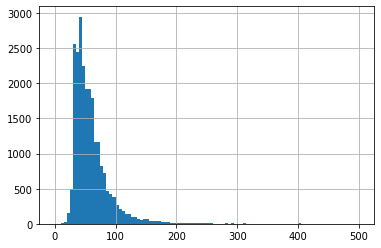

In [677]:
# Изучим данные по столбцу total_area
df['total_area'].hist(bins = 100, range = (0,500))

(0.0, 150.0)

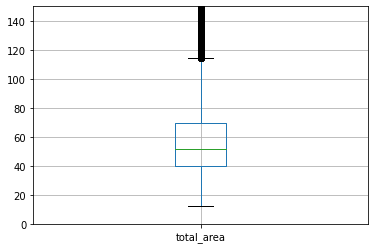

In [678]:
df.boxplot('total_area')
plt.ylim(0,150)

Распределение выглядит правдоподобно: квартир площадью менее 25 кв.м. практически нет, основная часть объявлений - это квартиры площадью 40-70 кв.м., пик приходится примерно на 50 кв.м., после 75 кв.м. число квартир значительно снижается. В данных есть выбросы - объявления с площадью более 100 кв.м. - отбросим эти данные.

In [679]:
df = df.query('total_area <= 100')

<AxesSubplot:>

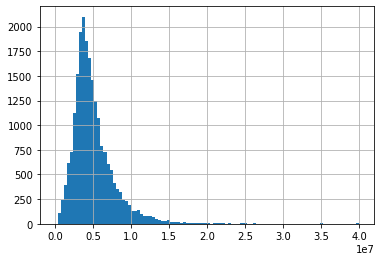

In [680]:
# Изучим данные по столбцу last_price
df['last_price'].hist(bins = 100, range = (0,40000000))

In [681]:
df['last_price_mln'] = df['last_price']/1000000
df['last_price_mln'].describe()

count    21744.000000
mean         5.087426
std          2.984363
min          0.430000
25%          3.306571
50%          4.450000
75%          6.100000
max         53.000000
Name: last_price_mln, dtype: float64

(0.0, 20.0)

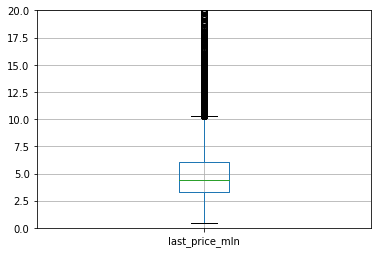

In [682]:
df.boxplot('last_price_mln')
plt.ylim(0,20)

Распределение выглядит правдоподобно: основная часть объявлений (50%) - квартиры стоимостью в диапазоне от 3 до 7 млн. руб. Количество объявлений с ценой более 10 млн. руб. стремительно убывает. В данных есть выбросы - удалим их.

In [683]:
df = df.query('last_price < 10000000')
df['last_price'].describe()

count    2.052700e+04
mean     4.586468e+06
std      1.910773e+06
min      4.300000e+05
25%      3.270000e+06
50%      4.300000e+06
75%      5.700000e+06
max      9.999999e+06
Name: last_price, dtype: float64

<AxesSubplot:>

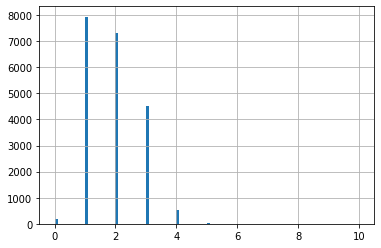

In [684]:
# Изучим данные по столбцу rooms
df['rooms'].hist(bins = 100, range = (0,10))

<AxesSubplot:>

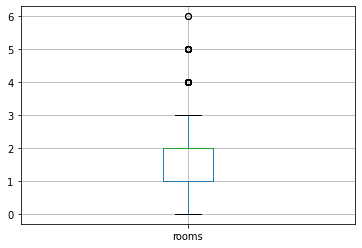

In [685]:
df.boxplot('rooms')

Большинство квартир имеют 1-3 комнаты. На гистограмме видно, что есть часть объявлений, у которых количество комнат = 0, это студии. На диаграмме размаха также видно, что есть ряд небольших выбросов.

<AxesSubplot:>

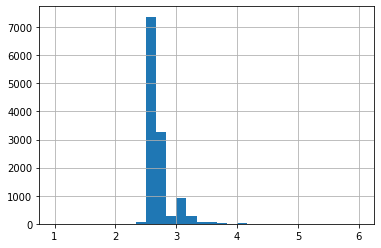

In [686]:
# Изучим данные по столбцу ceiling_height
df['ceiling_height'].hist(bins = 30, range = (1,6))

(0.0, 10.0)

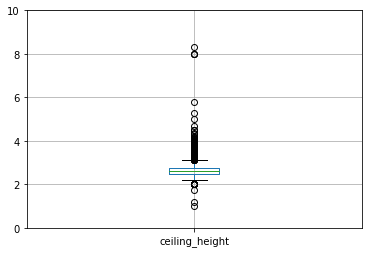

In [687]:
df.boxplot('ceiling_height')
plt.ylim(0,10)

У основной части квартир высота потолков от 2,5 до 2,7 м. Удалим аномальные значения, где высота потолков более 8 метров.

In [688]:
df = df.query('ceiling_height < 8')
df['ceiling_height'].describe()

count    12385.000000
mean         2.673058
std          0.220347
min          1.000000
25%          2.500000
50%          2.600000
75%          2.750000
max          5.800000
Name: ceiling_height, dtype: float64

### Изучим время продажи квартиры

<AxesSubplot:>

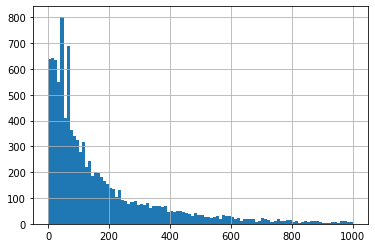

In [689]:
df['days_exposition'].hist(bins = 100, range = (0,1000))

Распределение выглядит правдоподобно, основная часть квартир продается за первые 100 дней с момента размещения объявления. На гистограмме виден всплеск продаж примерно на 45-50 день. Изучим данные подробнее.

(0.0, 1000.0)

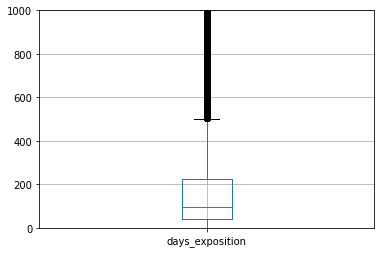

In [690]:
df.boxplot('days_exposition')
plt.ylim(0,1000)

In [691]:
df['days_exposition'].describe()

count    10513.000000
mean       177.069913
std        214.668028
min          1.000000
25%         43.000000
50%         95.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

Первое на что стоит обратить внимание - это значительное отличие медианы от среднего значения, это означает, что у распределения длинный хвост высоких значений, которые оттягивают среднее. Медианное значение - 88 дня (примерно 3 месяца), что вполне правдоподобно. Можно считать, что продажа прошла быстро, если она состоялась в срок до 41 дня. Свыше 209 дней - это долгие продажи.

### Исследуем редкие и выбивающиеся значения

Изучим данные на аномалии по следующим столбцам, которые будут необходимы нам для дальнейшего исследования:
- `balcony`
- `kitchen_area`
- `living_area`

<AxesSubplot:>

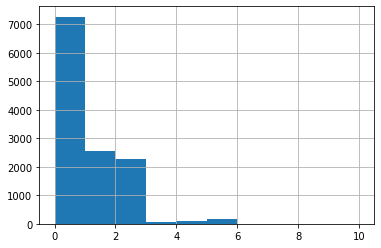

In [692]:
# Изучим данные по столбцу balcony
df['balcony'].hist(bins = 10, range = (0,10))

(-5.0, 10.0)

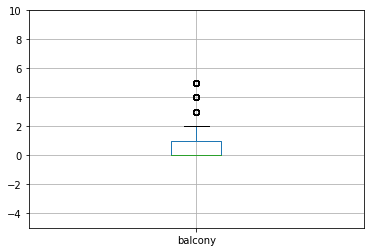

In [693]:
df.boxplot('balcony')
plt.ylim(-5,10)

На диаграмме рассеивания видно, что есть объявления, где количество балконов больше 2-х. Предположим, что теоретически  балконы могут находится в каждой комнате + 1 на кухне, следовательно отбросим объявления, где количество балконов неправдоподобно велико: больше чем количество комнат + 1.

In [694]:
df = df.query('balcony < (rooms +1)')

<AxesSubplot:>

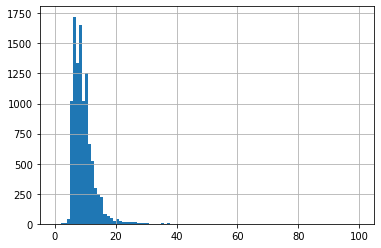

In [695]:
# Изучим данные по столбцу kitchen_area и living_area
df['kitchen_area'].hist(bins = 100, range = (0,100))

(-5.0, 100.0)

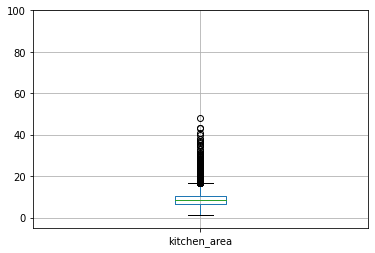

In [696]:
df.boxplot('kitchen_area')
plt.ylim(-5,100)

Данные соответствуют реальности большинство объектов с площадью кухни от 7 до 11 метров, но также есть кухни и побольше, выбросы по ним обработаем после проверки данных по столбцу `living_area`.

<AxesSubplot:>

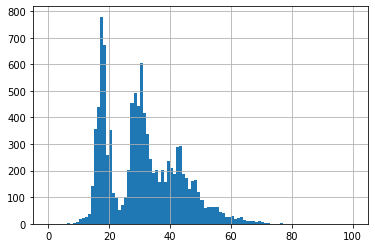

In [697]:
df['living_area'].hist(bins = 100, range = (0,100))

(-5.0, 100.0)

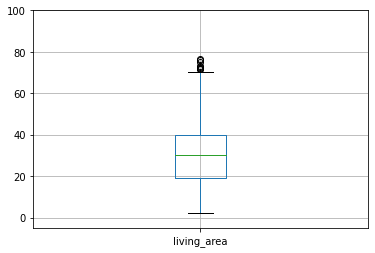

In [698]:
df.boxplot('living_area')
plt.ylim(-5,100)

In [699]:
df['living_area'].describe()

count    10506.000000
mean        30.954300
std         11.996666
min          2.000000
25%         19.000000
50%         30.000000
75%         39.900000
max         76.400000
Name: living_area, dtype: float64

In [700]:
df[df['living_area_ratio'] < 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cost_per_square_meter,day_of_week_exposition,month_exposition,year_exposition,floor_type,living_area_ratio,kitchen_area_ratio,last_price_mln
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6.0,2.0,2,False,...,1012.0,91.0,122115,1,2,2018,другой,3.85,17.31,6.35
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9.0,5.4,1,False,...,NaN,33.0,78608,3,2,2019,первый,6.96,12.63,6.10


В датасете встречаются объявления, где жилая площадь очень мала, при нормальной общей площади и площади кухни - это выбросы, удалим их. 

In [701]:
df = df.query('living_area_ratio > 10')

Обработаем выбросы по `living_area` и `kitchen_area`: логично предположить, что сумма жилой площади и площади кухни не должна превышать общую площадь квартиры. Проверим, есть ли в нашем датасете такие объявления.

In [702]:
df[(df['living_area']+df['kitchen_area']) > df['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cost_per_square_meter,day_of_week_exposition,month_exposition,year_exposition,floor_type,living_area_ratio,kitchen_area_ratio,last_price_mln
184,7,2600000.0,30.20,2018-02-14,1,2.65,9.0,26.10,5,False,...,824.0,12.0,86093,2,2,2018,другой,86.42,20.53,2.60000
601,12,5600000.0,53.70,2017-04-18,2,2.50,12.0,48.30,5,False,...,1250.0,167.0,104283,1,4,2017,другой,89.94,13.04,5.60000
1155,11,7000000.0,38.00,2019-04-09,1,3.20,5.0,33.00,1,False,...,689.0,NaN,184211,1,4,2019,первый,86.84,31.58,7.00000
1992,5,4000000.0,37.40,2018-02-11,1,2.53,16.0,36.40,10,False,...,1052.0,74.0,106952,6,2,2018,другой,97.33,22.99,4.00000
3891,4,2600000.0,70.40,2017-07-29,3,2.50,5.0,68.10,5,False,...,NaN,45.0,36932,5,7,2017,последний,96.73,12.78,2.60000
4366,15,5000000.0,47.70,2018-09-09,2,2.68,13.0,39.80,12,False,...,NaN,19.0,104822,6,9,2018,другой,83.44,59.12,5.00000
5096,13,3500000.0,42.00,2019-01-25,1,3.00,12.0,34.00,1,False,...,NaN,48.0,83333,4,1,2019,первый,80.95,21.43,3.50000
6559,10,4000000.0,26.00,2017-10-25,1,2.60,14.0,20.00,7,False,...,469.0,154.0,153846,2,10,2017,другой,76.92,30.77,4.00000
6802,15,7500000.0,69.00,2017-02-15,2,4.50,3.0,64.00,3,False,...,852.0,427.0,108696,2,2,2017,последний,92.75,36.23,7.50000
7239,10,9990000.0,90.00,2016-06-13,3,3.10,6.0,76.40,6,False,...,118.0,630.0,111000,0,6,2016,последний,84.89,48.22,9.99000


Всего 29 строк - удалим их, это выбросы.

In [703]:
df = df.query('(living_area + kitchen_area) < total_area')

### Изучим, какие факторы больше всего влияют на стоимость квартиры

Для начала рассмотрим, зависит ли цена от площади, числа комнат и удаленности от центра

In [704]:
price_corr = df[['cost_per_square_meter','total_area','rooms','city_centers_nearest']].corr()
price_corr

,cost_per_square_meter,total_area,rooms,city_centers_nearest
cost_per_square_meter,1.000000,-0.132714,-0.259490,-0.393589
total_area,-0.132714,1.000000,0.801218,-0.106318
rooms,-0.259490,0.801218,1.000000,-0.057242
city_centers_nearest,-0.393589,-0.106318,-0.057242,1.000000


<AxesSubplot:xlabel='total_area', ylabel='cost_per_square_meter'>

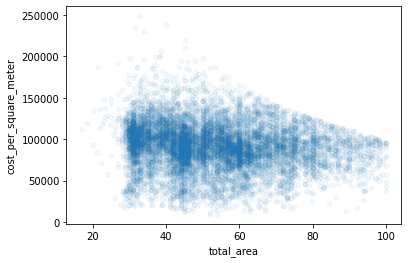

In [705]:
df.plot(x = 'total_area', y = 'cost_per_square_meter', kind='scatter', alpha=0.05)

<AxesSubplot:xlabel='rooms', ylabel='cost_per_square_meter'>

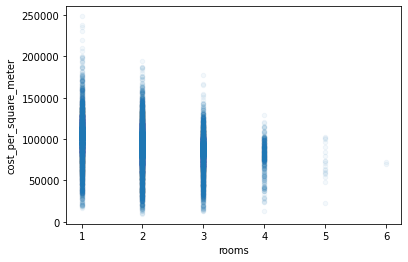

In [706]:
df.plot(x = 'rooms', y = 'cost_per_square_meter', kind='scatter', alpha=0.05)

<AxesSubplot:xlabel='city_centers_nearest', ylabel='cost_per_square_meter'>

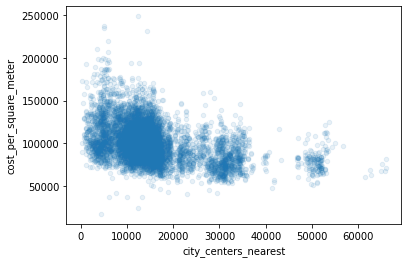

In [707]:
df.plot(x = 'city_centers_nearest', y = 'cost_per_square_meter', kind='scatter', alpha=0.10)

Взаимосвязь во всех трёх случаях обратно пропорциональна, при этом:
1. цена за квадратный метр практически не зависит от общей площади и начинает немного снижаться с увеличением площади свыше 60 м.
2. связь между количеством комнат и ценой также незначительна и с увеличением количества комнат постепенно снижается.
3. наибольшая зависимость наблюдается у цены с параметром удаленность от центра, что логично: чем дальше от центра, тем цена ниже.  

In [708]:
price_and_floor_type = df.pivot_table(index = 'floor_type', values = 'cost_per_square_meter', aggfunc = ['mean','median'])
price_and_floor_type

,mean,median
,cost_per_square_meter,cost_per_square_meter
floor_type,,
другой,95425.695178,95833
первый,80965.256081,82353
последний,83473.850000,85526


Стоимость квартир на первом и последнем этажах ниже, чем на всех остальных, при этом на первом этаже в сравнении с другими этажами стоимость ниже на 14%, а на последнем - на 11%.

Изучим взаимосвязь между ценой и датой размещения

<AxesSubplot:xlabel='day_of_week_exposition', ylabel='cost_per_square_meter'>

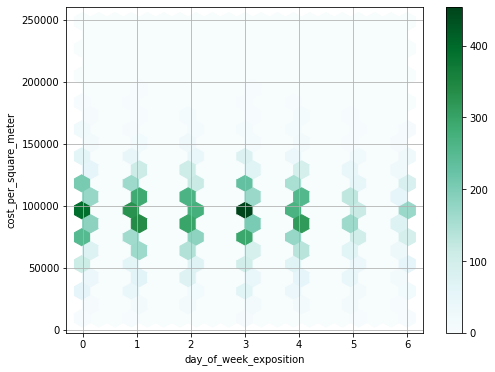

In [709]:
# 1) Взаимосвязь между ценой и днём публикации объявления
df.plot(x='day_of_week_exposition', y='cost_per_square_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Дешевле всего квадратный метр стоит в объявлениях, размещенных на выходных.

<AxesSubplot:xlabel='month_exposition', ylabel='cost_per_square_meter'>

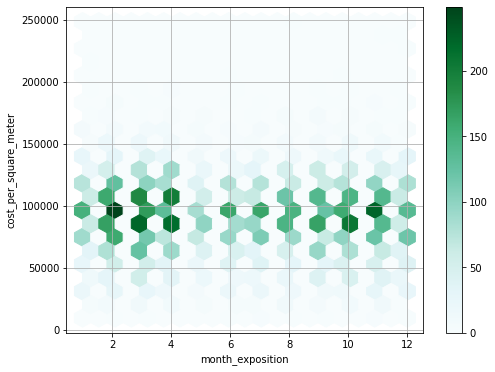

In [710]:
# 2) Взаимосвязь между ценой и месяцем публикации объявления
df.plot(x='month_exposition', y='cost_per_square_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Дороже всего цена квадратного метра у квартир, выставленных на продажу с февраля по апрель, дешевле всего в мае. Также на графике видно, что квартиры дорожают осенью, а в декабре-январе цена немного снижаются.

<AxesSubplot:xlabel='year_exposition', ylabel='cost_per_square_meter'>

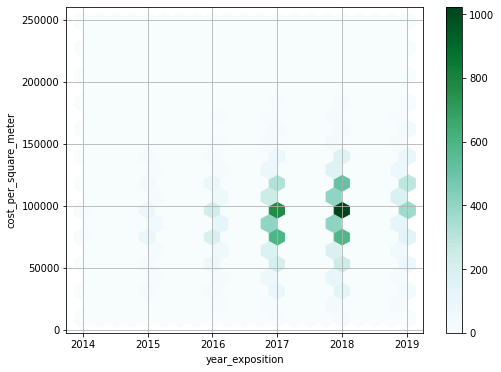

In [711]:
# 3) Взаимосвязь между ценой и годом публикации объявления
df.plot(x='year_exposition', y='cost_per_square_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

На графике четко прослеживается тенденция роста стоимости квадратного метра от года к году, однако важно отметить, что дороже всего квартиры стоили в 2018 году.

### Выделим населенные пункты с самой высокой и самой низкой стоимостью жилья

In [712]:
top_10_price = df.pivot_table(index = 'locality_name', values = 'cost_per_square_meter', aggfunc = ['count','mean'])
top_10_price.columns = ['count','mean']
top_10_price = top_10_price.sort_values(by = 'count', ascending=False)
top_10_price.head(10)

,count,mean
locality_name,,
Санкт-Петербург,6780,103805.049410
Всеволожск,212,66330.400943
Пушкин,180,99427.900000
посёлок Шушары,175,78824.125714
Колпино,172,75369.924419
Мурино,134,85129.567164
Кудрово,133,94560.511278
Петергоф,125,82854.072000
Гатчина,108,68923.518519


Стоимость квадратного метра больше всего в Санкт-Петербурге и Пушкине, дешевле всего квартиру можно купить во Всеволожске. 

### Выделим квартиры, которые находятся в центре Санкт-Петербурга

<AxesSubplot:xlabel='cente_nearest_km'>

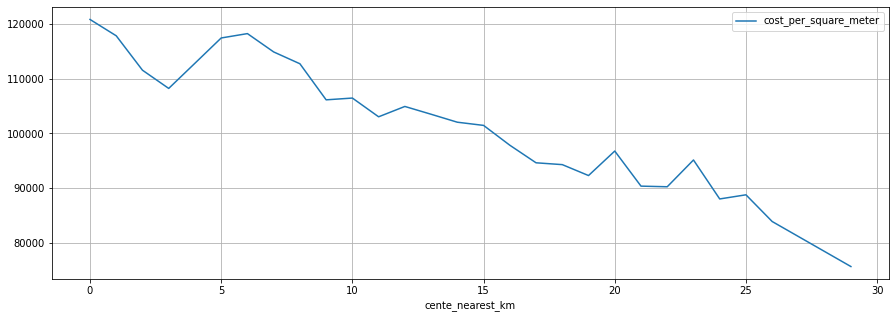

In [713]:
import warnings
warnings.filterwarnings('ignore')

# Выделим объявления в СПб
centre_spb = df.query('locality_name == "Санкт-Петербург"')
# Создадим дополнительный столбец с расстоянием до центра в километрах
centre_spb['cente_nearest_km'] = (centre_spb['city_centers_nearest']/1000).round()
# Посчитаем среднюю цену для каждого километра
centre_spb_cost = centre_spb.pivot_table(index = 'cente_nearest_km', values = 'cost_per_square_meter', aggfunc = 'mean')
# Построим график зависимости цены от расстояния от центра
centre_spb_cost.plot(grid = True, figsize = (15,5))

Начиная примерно 8-9 км. стоимость квадратного метра начинает стремительно убывать, таким образом, делаем вывод, что центр город составляет примерно 8-9 км.

### Исследуем квартиры в центре города

Проанализируем площадь, цену, число комнат, высоту потолков. Выделим факторы, которые влияют на стоимость квартиры.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

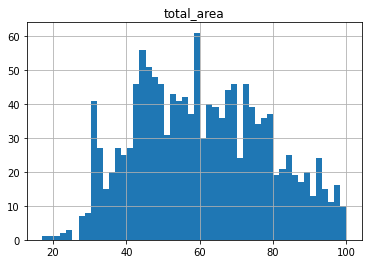

In [714]:
df_centre_spb = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest < 9000')
df_centre_spb.hist('total_area',bins = 50)

In [715]:
df_centre_spb['total_area'].describe()

count    1368.000000
mean       60.699817
std        17.890303
min        17.000000
25%        46.177500
50%        60.000000
75%        74.300000
max       100.000000
Name: total_area, dtype: float64

Квартиры в центре города имеют большую площадь, 50% квартир от 46 до 74 метров, при этом медианное значение - 60 м.,по всей базе медиана составляла 50 м.

<AxesSubplot:>

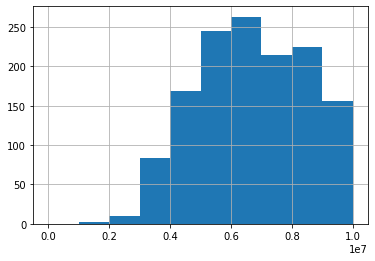

In [716]:
df_centre_spb['last_price'].hist(bins = 10, range = (0,10000000))

(0.0, 10000000.0)

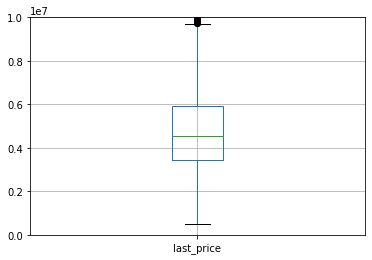

In [717]:
df.boxplot('last_price')
plt.ylim(0,10000000)

Стоимость квартир в центре гораздо выше, пик на уровне 6 млн. руб., в рамках всей базы пик примерно 3-4 млн.

<AxesSubplot:>

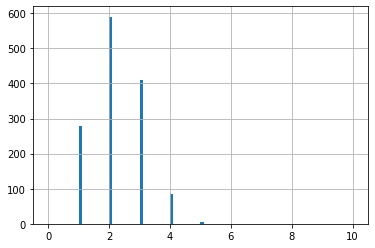

In [718]:
df_centre_spb['rooms'].hist(bins = 100, range = (0,10))

In [719]:
df_centre_spb['cost_per_square_meter'].corr(df_centre_spb['rooms'])

-0.5101628363011226

In [720]:
df['cost_per_square_meter'].corr(df['rooms'])

-0.2594895940229904

В центре преобладают 2-х комнатные квартиры, однокомнатных квартир не так много, хотя в целом по в СПб и ЛО больше всего 1-х квартир. Также в центре сильнее связь между ценой за квадратный метр и количеством комнат, так, чем больше комнат, тем ниже стоимость квадратного метра.

In [721]:
df_centre_spb['ceiling_height'].describe()

count    1368.000000
mean        2.943765
std         0.327534
min         2.400000
25%         2.700000
50%         3.000000
75%         3.150000
max         4.370000
Name: ceiling_height, dtype: float64

Потолки в центре города выше, в 50% случаях от 2,7 до 3,15 метров, в целом по СПб и ЛО - от 2,5 до 2,7 м.

Выделим параметры, которые влияют на стоимость квартиры в центре

<AxesSubplot:>

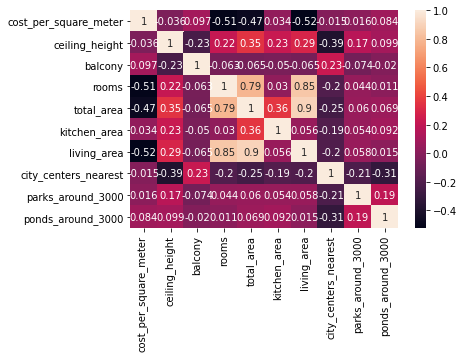

In [730]:
# Построим корреляционную матрицу для центра СПб
df_centre_spb_corr = df_centre_spb[['cost_per_square_meter','ceiling_height','balcony','rooms','total_area','kitchen_area','living_area', 'city_centers_nearest','parks_around_3000','ponds_around_3000']].corr()
sn.heatmap(df_centre_spb_corr, annot=True)

<AxesSubplot:>

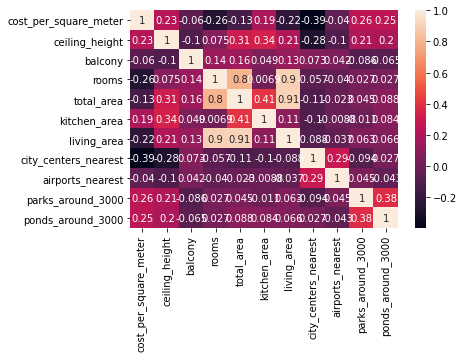

In [727]:
# Построим корреляционную матрицу для общих данных
df_spb_corr = df[['cost_per_square_meter','ceiling_height','balcony','rooms','total_area','kitchen_area','living_area', 'city_centers_nearest', 'airports_nearest','parks_around_3000','ponds_around_3000']].corr()
sn.heatmap(df_spb_corr, annot=True)

В центре СПб наибольшее влияние на цену оказывают три параметра, которые напрямую связаны с площадью: количество комнат, общая и жилая площадь, при этом связь обратно пропорциональна, чем больше комнат, общая и жилая площадь, тем ниже стоимость за квадратный метр.

В целом по региону помимо вышеперечисленных параметров на цену также примерно в равной степени влияют высота потолка, количество парков и прудов в радиусе 3 км, при этом в последних 3-х случаях зависимость положительная.

Изучим взаимосвязь между ценой и датой размещения по квартирам в центре СПб

<AxesSubplot:xlabel='day_of_week_exposition', ylabel='cost_per_square_meter'>

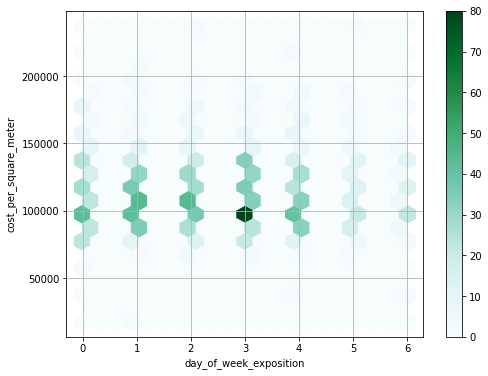

In [732]:
# 1) Взаимосвязь между ценой и днём публикации объявления
df_centre_spb.plot(x='day_of_week_exposition', y='cost_per_square_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Общая тенденция без изменений - дешевле всего квадратный метр стоит в объявлениях, размещенных в выходные дни.

<AxesSubplot:xlabel='month_exposition', ylabel='cost_per_square_meter'>

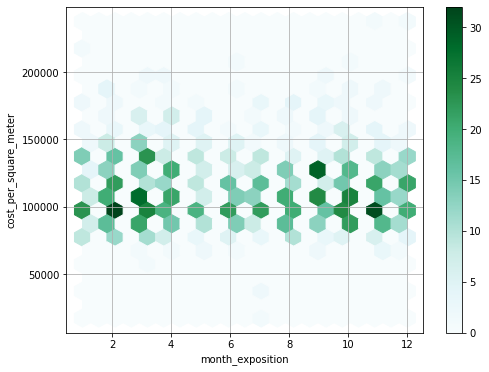

In [733]:
# 2) Взаимосвязь между ценой и месяцем публикации объявления
df_centre_spb.plot(x='month_exposition', y='cost_per_square_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Стоимость квадратного метра в центре по месяцам распределена более равномерно, чем по общим данным, но всё же дешевле всего квартиры стоят в мае, а дороже всего в марте и сентябре.

<AxesSubplot:xlabel='year_exposition', ylabel='cost_per_square_meter'>

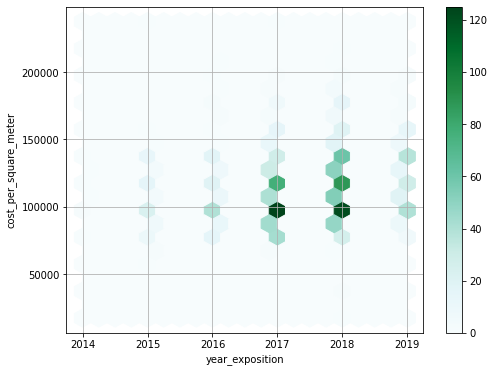

In [734]:
# 3) Взаимосвязь между ценой и годом публикации объявления
df_centre_spb.plot(x='year_exposition', y='cost_per_square_meter', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Динамика стоимости в разрезе года аналогична общим данным: стоимость квадратного метра увеличивает от года к году, при этом самые высокие цены были в 2018 г.

## Общий вывод

Целью нашего исследования было выявление параметров для определения рыночной стоимости объектов недвижимости. Исследование проходило в несколько этапов:
1. предобработка данных, данный этап включал в себя удаление дубликатов, заполнение пропусков и изменение типов данных.
2. расчёт дополнительных параметров, категоризация данных
3. исследование взаимосвязи между различными параметрами

В ходе анализа мы пришли к следующим выводам:

**Общие характеристики**
- основная часть квартир продается за первые 100 дней с момента размещения объявления, при этом можно считать, что продажа прошла быстро, если она состоялась в срок до 41 дня, если же свыше 209 дней - это долгие продажи
- стоимость квартир на первом и последнем этажах ниже, чем на всех остальных, при этом на первом этаже в сравнении с другими этажами стоимость ниже на 14%, а на последнем - на 11%
- самые дорогие квартиры в Санкт-Петербурге и Пушкине, дешевле всего квартиру можно купить во Всеволожске
- ниже всего цена за квадратный метр в объявлениях, размещенных в выходные дни
- дороже всего цена квадратного метра у квартир, выставленных на продажу с февраля по апрель, дешевле всего в мае
- от года к году наблюдается тенденция к увеличению цены за квадратный метр

**Сравнение с объектами, расположенными в центре города**
- чем дальше от центра города, тем стоимость квартир меньше, квартиры же в центре примерно в 2 раза дороже, чем в других районах.
- цена за квадратный метр в целом практически не зависит от общей площади и начинает немного снижаться с увеличением площади свыше 60 м., в центре Петербурга зависимость этих параметров сильнее.
- в центре Петербурга преобладают 2-х комнатные квартиры, в целом же по в СПб и ЛО больше всего 1-х квартир